In [35]:
import pandas as pd
import numpy as np
import seaborn
import sklearn.cross_validation

%matplotlib inline 

seaborn.set()

from pandas import DataFrame
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
data = pd.read_csv("../data/train.csv")

In [3]:
test_data = pd.read_csv("../data/test.csv")

In [4]:
len(data)

878049

In [5]:
data.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [7]:
data.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING', 'SEX OFFENSES NON FORCIBLE',
       'EXTORTION', 'GAMBLING', 'BAD CHECKS', 'TREA', 'RECOVERED VEHICLE',
       'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

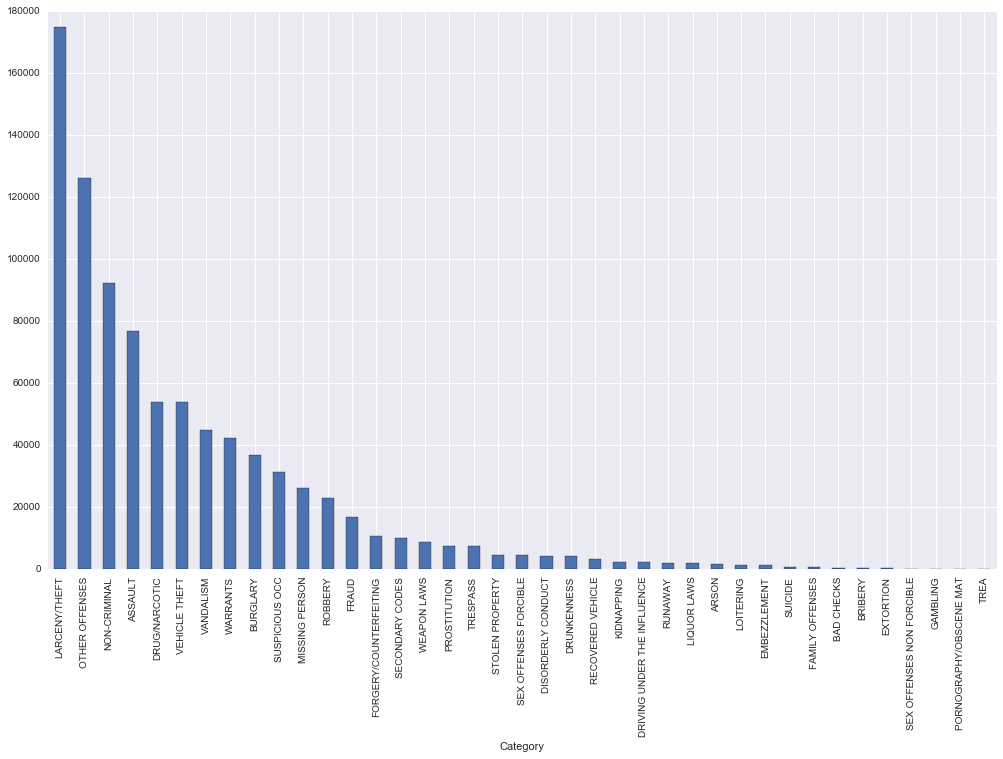

In [63]:
crimes = data.groupby('Category').size()
crimes = crimes.sort_values(ascending=False)
crimes.plot(kind='bar', figsize=(17,10))


In [64]:
crimes

Category
LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQ

In [71]:
crimes/crimes.sum()

Category
LARCENY/THEFT                  0.199192
OTHER OFFENSES                 0.143707
NON-CRIMINAL                   0.105124
ASSAULT                        0.087553
DRUG/NARCOTIC                  0.061467
VEHICLE THEFT                  0.061251
VANDALISM                      0.050937
WARRANTS                       0.048077
BURGLARY                       0.041860
SUSPICIOUS OCC                 0.035777
MISSING PERSON                 0.029599
ROBBERY                        0.026194
FRAUD                          0.018996
FORGERY/COUNTERFEITING         0.012082
SECONDARY CODES                0.011372
WEAPON LAWS                    0.009743
PROSTITUTION                   0.008523
TRESPASS                       0.008343
STOLEN PROPERTY                0.005171
SEX OFFENSES FORCIBLE          0.004997
DISORDERLY CONDUCT             0.004920
DRUNKENNESS                    0.004874
RECOVERED VEHICLE              0.003574
KIDNAPPING                     0.002666
DRIVING UNDER THE INFLUENCE    

In [49]:
five = crimes.head(5)

# Crimes by year

In [33]:
df = data
df['year'] = pd.to_datetime(data['Dates']).dt.year


Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
5       2015-05-13 23:30:00           LARCENY/THEFT   
6       2015-05-13 23:30:00           VEHICLE THEFT   
7       2015-05-13 23:30:00           VEHICLE THEFT   
8       2015-05-13 23:00:00           LARCENY/THEFT   
9       2015-05-13 23:00:00           LARCENY/THEFT   
10      2015-05-13 22:58:00           LARCENY/THEFT   
11      2015-05-13 22:30:00          OTHER OFFENSES   
12      2015-05-13 22:30:00               VANDALISM   
13      2015-05-13 22:06:00           LARCENY/THEFT   
14      2015-05-13 22:00:00            NON-CRIMINAL   
15      2015-05-13 22:00:00            NON-CRIMINAL   
16      2015-05-13 22:00:00                 ROBBERY   
17      2015-05-13 21:55:00                 ASSAULT   
18      2015-05-13 21:40:00          OTHER OFFENSES   
19      2015-05-13 21:30:00            NON-CRIMINAL   
20      2015-05-13 21:30:00           LARCENY/THEFT   
21      2015-05-13 21:17:00                 ROBBERY   
22      2015-05-13 21:11:00                WARRANTS   
23      2015-05-13 21:11:00            NON-CRIMINAL   
24      2015-05-13 21:10:00           LARCENY/THEFT   
25      2015-05-13 21:00:00            NON-CRIMINAL   
26      2015-05-13 21:00:00           LARCENY/THEFT   
27      2015-05-13 21:00:00           LARCENY/THEFT   
28      2015-05-13 21:00:00           LARCENY/THEFT   
29      2015-05-13 20:56:00          OTHER OFFENSES   
...                     ...                     ...   
878019  2003-01-06 02:37:00          OTHER OFFENSES   
878020  2003-01-06 02:32:00          OTHER OFFENSES   
878021  2003-01-06 02:24:00               VANDALISM   
878022  2003-01-06 02:16:00           VEHICLE THEFT   
878023  2003-01-06 02:15:00           LARCENY/THEFT   
878024  2003-01-06 02:09:00          OTHER OFFENSES   
878025  2003-01-06 02:06:00          OTHER OFFENSES   
878026  2003-01-06 02:06:00                WARRANTS   
878027  2003-01-06 02:00:00                WARRANTS   
878028  2003-01-06 02:00:00                 ASSAULT   
878029  2003-01-06 01:54:00          OTHER OFFENSES   
878030  2003-01-06 01:54:00   SEX OFFENSES FORCIBLE   
878031  2003-01-06 01:50:00                 ASSAULT   
878032  2003-01-06 01:36:00          OTHER OFFENSES   
878033  2003-01-06 01:30:00               VANDALISM   
878034  2003-01-06 01:30:00                TRESPASS   
878035  2003-01-06 00:55:00                 ASSAULT   
878036  2003-01-06 00:55:00           LARCENY/THEFT   
878037  2003-01-06 00:55:00               VANDALISM   
878038  2003-01-06 00:42:00                WARRANTS   
878039  2003-01-06 00:40:00          OTHER OFFENSES   
878040  2003-01-06 00:33:00                 ASSAULT   
878041  2003-01-06 00:31:00          OTHER OFFENSES   
878042  2003-01-06 00:20:00                 ASSAULT   
878043  2003-01-06 00:20:00          OTHER OFFENSES   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek  PdDistrict  \
0                                  WARRANT ARREST  Wednesday    NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday        PARK   
5                  GRAND THEFT FROM UNLOCKED AUTO  Wednesday   INGLESIDE   
6                               STOLEN AUTOMOBILE  Wednesday   INGLESIDE   
7  

In [43]:
d = df.groupby(['Category', 'year']).size()
d = d.unstack('year').fillna(0)
dPerc = d/d.sum()
dPerc

year                             2003      2004      2005      2006      2007  \
Category                                                                        
ARSON                        0.002084  0.002002  0.001498  0.001459  0.001735   
ASSAULT                      0.088699  0.088080  0.081649  0.091033  0.089760   
BAD CHECKS                   0.000934  0.000572  0.000777  0.000672  0.000426   
BRIBERY                      0.000162  0.000245  0.000254  0.000272  0.000338   
BURGLARY                     0.040824  0.045354  0.048927  0.050780  0.039036   
DISORDERLY CONDUCT           0.005507  0.005707  0.004973  0.003934  0.004749   
DRIVING UNDER THE INFLUENCE  0.001827  0.001498  0.001385  0.001931  0.002411   
DRUG/NARCOTIC                0.065966  0.066370  0.061869  0.067230  0.076733   
DRUNKENNESS                  0.004506  0.004290  0.004733  0.005092  0.004969   
EMBEZZLEMENT                 0.001759  0.001335  0.001286  0.001473  0.001985   
EXTORTION                    0.000189  0.000395  0.000212  0.000257  0.000294   
FAMILY OFFENSES              0.000812  0.000708  0.000494  0.000758  0.000529   
FORGERY/COUNTERFEITING       0.015439  0.015295  0.015301  0.017365  0.019113   
FRAUD                        0.021867  0.018332  0.017011  0.019297  0.017746   
GAMBLING                     0.000189  0.000204  0.000141  0.000200  0.000279   
KIDNAPPING                   0.002206  0.001880  0.001893  0.002274  0.002485   
LARCENY/THEFT                0.175773  0.164951  0.175221  0.197371  0.187606   
LIQUOR LAWS                  0.001854  0.002547  0.002162  0.001759  0.002955   
LOITERING                    0.001353  0.001784  0.001936  0.000687  0.003235   
MISSING PERSON               0.025182  0.025006  0.026689  0.030983  0.029361   
NON-CRIMINAL                 0.088847  0.093732  0.098560  0.094909  0.092230   
OTHER OFFENSES               0.143623  0.140612  0.125009  0.133931  0.143483   
PORNOGRAPHY/OBSCENE MAT      0.000014  0.000041  0.000057  0.000043  0.000044   
PROSTITUTION                 0.012490  0.009820  0.007502  0.008797  0.013953   
RECOVERED VEHICLE            0.000000  0.000000  0.000000  0.007996  0.007248   
ROBBERY                      0.021853  0.023739  0.025318  0.029882  0.029067   
RUNAWAY                      0.002463  0.002969  0.002797  0.002875  0.001853   
SECONDARY CODES              0.008241  0.008812  0.007319  0.010485  0.010806   
SEX OFFENSES FORCIBLE        0.004871  0.004222  0.004380  0.004334  0.004602   
SEX OFFENSES NON FORCIBLE    0.000189  0.000191  0.000127  0.000229  0.000294   
STOLEN PROPERTY              0.004763  0.004222  0.003730  0.003962  0.003499   
SUICIDE                      0.000663  0.000681  0.000565  0.000644  0.000618   
SUSPICIOUS OCC               0.028457  0.030822  0.033075  0.034388  0.035125   
TREA                         0.000000  0.000000  0.000000  0.000000  0.000000   
TRESPASS                     0.010081  0.007695  0.007530  0.007867  0.008675   
VANDALISM                    0.044261  0.043407  0.049068  0.055644  0.054297   
VEHICLE THEFT                0.102609  0.119283  0.128725  0.052926  0.047784   
WARRANTS                     0.061257  0.054561  0.048235  0.046561  0.051253   
WEAPON LAWS                  0.008187  0.008635  0.009593  0.009698  0.009424   

year                             2008      2009      2010      2011      2012  \
Category                                                                        
ARSON                        0.001910  0.001725  0.001563  0.001471  0.001701   
ASSAULT                      0.090162  0.086609  0.092092  0.091821  0.086420   
BAD CHECKS                   0.000527  0.000377  0.000286  0.000450  0.000335   
BRIBERY                      0.000299  0.000290  0.000451  0.000405  0.000390   
BURGLARY                     0.039901  0.038159  0.037435  0.037752  0.043705   
DISORDERLY CONDUCT           0.005885  0.007130  0.006462  0.005974  0.004991   
DRIVING UNDER THE INFLUENCE  0

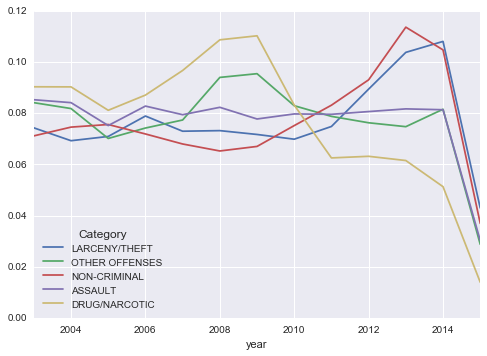

In [57]:
d = df.groupby(['Category', 'year']).size()
d = d.unstack('Category').fillna(0)
d = d[five.index]
dPerc = d/d.sum() #distribution for each type of crime over the years
dPerc.plot()

+ year should be a good feature 
+ we should cut classes with too few entries?

Category  LARCENY/THEFT  OTHER OFFENSES  NON-CRIMINAL  ASSAULT  DRUG/NARCOTIC
year                                                                         
2003            12990.0         10614.0        6566.0   6555.0         4875.0
2004            12111.0         10324.0        6882.0   6467.0         4873.0
2005            12402.0          8848.0        6976.0   5779.0         4379.0
2006            13798.0          9363.0        6635.0   6364.0         4700.0
2007            12760.0          9759.0        6273.0   6105.0         5219.0
2008            12800.0         11860.0        6021.0   6327.0         5866.0
2009            12538.0         12044.0        6185.0   5976.0         5951.0
2010            12214.0         10464.0        6937.0   6128.0         4489.0
2011            13084.0          9938.0        7673.0   6117.0         3374.0
2012            15639.0          9622.0        8589.0   6199.0         3408.0
2013            18152.0          9430.0       10489.0   6280.0         3319.0
2014            18901.0         10290.0        9669.0   6254.0         2767.0
2015             7511.0          3626.0        3409.0   2325.0          751.0

features:
+ day of week(?)
+ year
+ evt month
+ hour?? (evening vs mid-day)
+ X + Y, in verschiedenen Reqgionen unterteilen
+ street names ??? // pairs???
+ cut off last classes ? 
+ district


In [29]:

def year(data):
    df = data
    df['year'] = pd.to_datetime(data['Dates']).dt.year
    years = np.asarray(pd.get_dummies(df['year']))
    return years

def policeDepartment(data):
    d = data['PdDistrict']
    d = pd.get_dummies(d)
    return np.asarray(d)

def month(data):
    df = data
    df['month'] = pd.to_datetime(data['Dates']).dt.month
    years = np.asarray(pd.get_dummies(df['month']))
    return years

def regions(data):
    df = data
    cutX = pd.qcut(data.X, 5, labels=[1,2,3,4,5])
    cutY = pd.qcut(data.Y, 5, labels=[1,2,3,4,5])
    df['cutX'] = cutX
    df['cutY'] = cutY
    sumF = df['cutX']*6 + df['cutY']
    features = pd.get_dummies(sumF)
    return np.asarray(features)
    
def getY(data):
    numCat = len(data['Category'].unique()) 
    d = data['Category']
    d = d.astype('category')
    d = d.cat.rename_categories(np.arange(numCat))
    return np.asarray(d)

def getX(data):
    yearF = year(data)
    pdF = policeDepartment(data)
    monthF = month(data)
#    regionsF = regions(data)
#    print(regionsF.shape)

#    f = np.concatenate([yearF, pdF, monthF, regionsF], axis=1).astype(float)
    f = np.concatenate([yearF, pdF, monthF], axis=1).astype(float)
    return f

def getXRegions(data):
    yearF = year(data)
    pdF = policeDepartment(data)
    monthF = month(data)
    regionsF = regions(data)
    print(regionsF.shape)

    f = np.concatenate([yearF, pdF, monthF, regionsF], axis=1).astype(float)
#    f = np.concatenate([yearF, pdF, monthF], axis=1).astype(float)
    return f

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [10]:
features = getX(data)
labels_features = getY(data)

x_train, x_test, y_train, y_test = train_test_split(features, labels_features, test_size=0.3)

#test = getX(test_data)
#labels_test = getY(test_data)

13,56%

In [11]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print("Accuracy")
print(accuracy_score(y_test, pred))

Accuracy
0.224170984948


In [51]:
model = SGDClassifier()
%time model.fit(train, labels_train)
pred = model.predict(test)

print("Accuracy")
print(accuracy_score(labels_test, pred))

CPU times: user 54.6 s, sys: 706 ms, total: 55.3 s
Wall time: 56.9 s
Accuracy
0.142643519895


In [52]:
from sklearn import cross_validation

cvNoXY = cross_validation.cross_val_score(model, train, labels_train, cv=5)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 16 µs


In [56]:
print(cvNoXY.mean())
print(cvNoXY.max())
print(cvNoXY.min())
print(cvNoXY.std())

0.0864358376385
0.202169395018
0.0349992027516
0.0592839971374


With X, Y as binary variable with 5x5 regions

In [59]:
cvXY = cross_validation.cross_val_score(model, train, labels_train, cv=5)

In [60]:
print(cvXY.mean())
print(cvXY.max())
print(cvXY.min())
print(cvXY.std())

0.0915742803985
0.201725266904
0.0416277533541
0.0569037137071


## Cutting categories:

A total of 39 categories

In [78]:
len(data['Category'].unique()) 

39

Let's cut the categories and use the 10 most common ones, these contain 83,5% of all crimes:

In [12]:
crimes = data.groupby('Category').size()
crimes = crimes.sort_values(ascending=False)
cPerc = crimes/crimes.sum()
cPerc[:10].sum()


0.8349442912639271

In [13]:
topCat = crimes[:10].index
mask = data.Category.isin(topCat)
filteredData = data[mask].copy() #because we are setting columns later ... maybe not necessary?

In [14]:
train = getX(filteredData)
labels_train = getY(filteredData)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(train, labels_train, test_size=0.3)
model = RandomForestClassifier(n_estimators=50, n_jobs=-1)

In [24]:
from sklearn.cross_validation import cross_val_score
cvCut10NoXY = cross_val_score(model, x_train, y_train, cv=5)

In [25]:
print(cvCut10NoXY.mean())
print(cvCut10NoXY.max())
print(cvCut10NoXY.min())
print(cvCut10NoXY.std())

0.269242087108
0.269803378997
0.268529615231
0.000499266771487


### With regions

In [30]:
train = getXRegions(filteredData)
labels_train = getY(filteredData)

(733122, 25)


In [34]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
%time cvCut10NoXY = cross_val_score(model, x_train, y_train, cv=5)

CPU times: user 15min 10s, sys: 19.6 s, total: 15min 30s
Wall time: 4min 25s


In [33]:
print(cvCut10NoXY.mean())
print(cvCut10NoXY.max())
print(cvCut10NoXY.min())
print(cvCut10NoXY.std())

0.269191415106
0.269766263628
0.268480897957
0.000420409411359


In [36]:
print(cvCut10NoXY.mean())
print(cvCut10NoXY.max())
print(cvCut10NoXY.min())
print(cvCut10NoXY.std())

0.269310288312
0.269725432118
0.268636793234
0.000479851176783


## GradientBoosting

In [ ]:
model = GradientBoostingClassifier()
%time cvCut10NoXY = cross_val_score(model, x_train, y_train, cv=5)

### X and Y

In [4]:
data.head()

Dates        Category                      Descript  \
0  2015-05-13 23:53:00        WARRANTS                WARRANT ARREST   
1  2015-05-13 23:53:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
2  2015-05-13 23:33:00  OTHER OFFENSES      TRAFFIC VIOLATION ARREST   
3  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   
4  2015-05-13 23:30:00   LARCENY/THEFT  GRAND THEFT FROM LOCKED AUTO   

   DayOfWeek PdDistrict      Resolution                    Address  \
0  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
1  Wednesday   NORTHERN  ARREST, BOOKED         OAK ST / LAGUNA ST   
2  Wednesday   NORTHERN  ARREST, BOOKED  VANNESS AV / GREENWICH ST   
3  Wednesday   NORTHERN            NONE   1500 Block of LOMBARD ST   
4  Wednesday       PARK            NONE  100 Block of BRODERICK ST   

            X          Y  
0 -122.425892  37.774599  
1 -122.425892  37.774599  
2 -122.424363  37.800414  
3 -122.426995  37.800873  
4 -122.438738  37.771541

In [16]:
x = data.X
y = data.Y
cutX = pd.qcut(x, 5, labels=[1,2,3,4,5])
cutY = pd.qcut(y, 5, labels=[1,2,3,4,5])

In [17]:
df = data
df['catX'] = cutX
df['cutY'] = cutY
df

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
5       2015-05-13 23:30:00           LARCENY/THEFT   
6       2015-05-13 23:30:00           VEHICLE THEFT   
7       2015-05-13 23:30:00           VEHICLE THEFT   
8       2015-05-13 23:00:00           LARCENY/THEFT   
9       2015-05-13 23:00:00           LARCENY/THEFT   
10      2015-05-13 22:58:00           LARCENY/THEFT   
11      2015-05-13 22:30:00          OTHER OFFENSES   
12      2015-05-13 22:30:00               VANDALISM   
13      2015-05-13 22:06:00           LARCENY/THEFT   
14      2015-05-13 22:00:00            NON-CRIMINAL   
15      2015-05-13 22:00:00            NON-CRIMINAL   
16      2015-05-13 22:00:00                 ROBBERY   
17      2015-05-13 21:55:00                 ASSAULT   
18      2015-05-13 21:40:00          OTHER OFFENSES   
19      2015-05-13 21:30:00            NON-CRIMINAL   
20      2015-05-13 21:30:00           LARCENY/THEFT   
21      2015-05-13 21:17:00                 ROBBERY   
22      2015-05-13 21:11:00                WARRANTS   
23      2015-05-13 21:11:00            NON-CRIMINAL   
24      2015-05-13 21:10:00           LARCENY/THEFT   
25      2015-05-13 21:00:00            NON-CRIMINAL   
26      2015-05-13 21:00:00           LARCENY/THEFT   
27      2015-05-13 21:00:00           LARCENY/THEFT   
28      2015-05-13 21:00:00           LARCENY/THEFT   
29      2015-05-13 20:56:00          OTHER OFFENSES   
...                     ...                     ...   
878019  2003-01-06 02:37:00          OTHER OFFENSES   
878020  2003-01-06 02:32:00          OTHER OFFENSES   
878021  2003-01-06 02:24:00               VANDALISM   
878022  2003-01-06 02:16:00           VEHICLE THEFT   
878023  2003-01-06 02:15:00           LARCENY/THEFT   
878024  2003-01-06 02:09:00          OTHER OFFENSES   
878025  2003-01-06 02:06:00          OTHER OFFENSES   
878026  2003-01-06 02:06:00                WARRANTS   
878027  2003-01-06 02:00:00                WARRANTS   
878028  2003-01-06 02:00:00                 ASSAULT   
878029  2003-01-06 01:54:00          OTHER OFFENSES   
878030  2003-01-06 01:54:00   SEX OFFENSES FORCIBLE   
878031  2003-01-06 01:50:00                 ASSAULT   
878032  2003-01-06 01:36:00          OTHER OFFENSES   
878033  2003-01-06 01:30:00               VANDALISM   
878034  2003-01-06 01:30:00                TRESPASS   
878035  2003-01-06 00:55:00                 ASSAULT   
878036  2003-01-06 00:55:00           LARCENY/THEFT   
878037  2003-01-06 00:55:00               VANDALISM   
878038  2003-01-06 00:42:00                WARRANTS   
878039  2003-01-06 00:40:00          OTHER OFFENSES   
878040  2003-01-06 00:33:00                 ASSAULT   
878041  2003-01-06 00:31:00          OTHER OFFENSES   
878042  2003-01-06 00:20:00                 ASSAULT   
878043  2003-01-06 00:20:00          OTHER OFFENSES   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek  PdDistrict  \
0                                  WARRANT ARREST  Wednesday    NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday        PARK   
5                  GRAND THEFT FROM UNLOCKED AUTO  Wednesday   INGLESIDE   
6                               STOLEN AUTOMOBILE  Wednesday   INGLESIDE   
7  

In [22]:
all = df.groupby(['catX', 'cutY']).size()

+ Larceny as percent of the crimes in the different zones
+ Larceny as percent of all crimes is 0.199192

In [23]:
larceny = df[df.Category == 'LARCENY/THEFT']
larceny.groupby(['catX', 'cutY']).size() / all

catX  cutY
1     1       0.182075
      2       0.184024
      3       0.183774
      4       0.204183
      5       0.304555
2     1       0.109403
      2       0.193883
      3       0.238163
      4       0.305749
      5       0.308412
3     1       0.091468
      2       0.099578
      3       0.203675
      4       0.082169
      5       0.229015
4     1       0.117057
      2       0.152555
      3       0.280895
      4       0.159602
      5       0.309852
5     1       0.074879
      2       0.204095
      3       0.254861
      4       0.410854
      5       0.336450
dtype: float64

In [26]:
all

catX  cutY
1     1       58388
      2       40424
      3       43189
      4       21231
      5       12382
2     1       31809
      2       40478
      3       38503
      4       24736
      5       40086
3     1       11720
      2       49288
      3       32871
      4       46076
      5       35657
4     1       13062
      2       23775
      3       20157
      4       67067
      5       51544
5     1       60631
      2       21686
      3       40885
      4       16473
      5       35931
dtype: int64

+ Assault as percent of the crimes in the different zones
+ Assault as percent of all crimes is 0.087553

In [24]:
larceny = df[df.Category == 'ASSAULT']
larceny.groupby(['catX', 'cutY']).size() / all

catX  cutY
1     1       0.084384
      2       0.081066
      3       0.064415
      4       0.080778
      5       0.049427
2     1       0.110849
      2       0.093928
      3       0.084253
      4       0.090678
      5       0.061917
3     1       0.139761
      2       0.091300
      3       0.087341
      4       0.095863
      5       0.091483
4     1       0.110473
      2       0.104522
      3       0.069604
      4       0.091565
      5       0.080339
5     1       0.123765
      2       0.080697
      3       0.073890
      4       0.063680
      5       0.073502
dtype: float64

In [39]:
l = df[['catX', 'cutY']]
sumF = df['catX']*6 + df['cutY']
pd.get_dummies(sumF)

7    8    9    10   11   13   14   15   16   17 ...    25   26   27  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0   
4       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
5       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
6       0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
7       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
8       0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
9       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
10      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
11      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
12      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
13      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
14      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
15      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
16      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
17      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
18      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
19      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
20      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
21      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
22      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
23      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
24      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0   
25      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
26      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0 ...   0.0  0.0  0.0   
27      0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
28      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
29      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ... ...   ...  ...  ...   
878019  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878020  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
878021  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
878022  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878023  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878024  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
878025  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878026  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878027  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878028  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878029  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
878030  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0 ...   0.0  0.0  0.0   
878031  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
878033  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878034  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
878035  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
878036  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0 ...   0.0  0.0  0.0   
878037  0

In [28]:
df

Dates                Category  \
0       2015-05-13 23:53:00                WARRANTS   
1       2015-05-13 23:53:00          OTHER OFFENSES   
2       2015-05-13 23:33:00          OTHER OFFENSES   
3       2015-05-13 23:30:00           LARCENY/THEFT   
4       2015-05-13 23:30:00           LARCENY/THEFT   
5       2015-05-13 23:30:00           LARCENY/THEFT   
6       2015-05-13 23:30:00           VEHICLE THEFT   
7       2015-05-13 23:30:00           VEHICLE THEFT   
8       2015-05-13 23:00:00           LARCENY/THEFT   
9       2015-05-13 23:00:00           LARCENY/THEFT   
10      2015-05-13 22:58:00           LARCENY/THEFT   
11      2015-05-13 22:30:00          OTHER OFFENSES   
12      2015-05-13 22:30:00               VANDALISM   
13      2015-05-13 22:06:00           LARCENY/THEFT   
14      2015-05-13 22:00:00            NON-CRIMINAL   
15      2015-05-13 22:00:00            NON-CRIMINAL   
16      2015-05-13 22:00:00                 ROBBERY   
17      2015-05-13 21:55:00                 ASSAULT   
18      2015-05-13 21:40:00          OTHER OFFENSES   
19      2015-05-13 21:30:00            NON-CRIMINAL   
20      2015-05-13 21:30:00           LARCENY/THEFT   
21      2015-05-13 21:17:00                 ROBBERY   
22      2015-05-13 21:11:00                WARRANTS   
23      2015-05-13 21:11:00            NON-CRIMINAL   
24      2015-05-13 21:10:00           LARCENY/THEFT   
25      2015-05-13 21:00:00            NON-CRIMINAL   
26      2015-05-13 21:00:00           LARCENY/THEFT   
27      2015-05-13 21:00:00           LARCENY/THEFT   
28      2015-05-13 21:00:00           LARCENY/THEFT   
29      2015-05-13 20:56:00          OTHER OFFENSES   
...                     ...                     ...   
878019  2003-01-06 02:37:00          OTHER OFFENSES   
878020  2003-01-06 02:32:00          OTHER OFFENSES   
878021  2003-01-06 02:24:00               VANDALISM   
878022  2003-01-06 02:16:00           VEHICLE THEFT   
878023  2003-01-06 02:15:00           LARCENY/THEFT   
878024  2003-01-06 02:09:00          OTHER OFFENSES   
878025  2003-01-06 02:06:00          OTHER OFFENSES   
878026  2003-01-06 02:06:00                WARRANTS   
878027  2003-01-06 02:00:00                WARRANTS   
878028  2003-01-06 02:00:00                 ASSAULT   
878029  2003-01-06 01:54:00          OTHER OFFENSES   
878030  2003-01-06 01:54:00   SEX OFFENSES FORCIBLE   
878031  2003-01-06 01:50:00                 ASSAULT   
878032  2003-01-06 01:36:00          OTHER OFFENSES   
878033  2003-01-06 01:30:00               VANDALISM   
878034  2003-01-06 01:30:00                TRESPASS   
878035  2003-01-06 00:55:00                 ASSAULT   
878036  2003-01-06 00:55:00           LARCENY/THEFT   
878037  2003-01-06 00:55:00               VANDALISM   
878038  2003-01-06 00:42:00                WARRANTS   
878039  2003-01-06 00:40:00          OTHER OFFENSES   
878040  2003-01-06 00:33:00                 ASSAULT   
878041  2003-01-06 00:31:00          OTHER OFFENSES   
878042  2003-01-06 00:20:00                 ASSAULT   
878043  2003-01-06 00:20:00          OTHER OFFENSES   
878044  2003-01-06 00:15:00                 ROBBERY   
878045  2003-01-06 00:01:00           LARCENY/THEFT   
878046  2003-01-06 00:01:00           LARCENY/THEFT   
878047  2003-01-06 00:01:00               VANDALISM   
878048  2003-01-06 00:01:00  FORGERY/COUNTERFEITING   

                                         Descript  DayOfWeek  PdDistrict  \
0                                  WARRANT ARREST  Wednesday    NORTHERN   
1                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
2                        TRAFFIC VIOLATION ARREST  Wednesday    NORTHERN   
3                    GRAND THEFT FROM LOCKED AUTO  Wednesday    NORTHERN   
4                    GRAND THEFT FROM LOCKED AUTO  Wednesday        PARK   
5                  GRAND THEFT FROM UNLOCKED AUTO  Wednesday   INGLESIDE   
6                               STOLEN AUTOMOBILE  Wednesday   INGLESIDE   
7  

In [ ]:
def feature_add_ending(data):
    add_ending = ['ST', 'AV', 'WY', 'BL', 'DR', 'CT', 'TR', 'HY', 'RD', 'PZ', 'PL',
       'LN', 'AY', 'AL', 'CR', 'MS', 'ER', 'EX',
       'AR']    
    add = data['Address'].str[-2:]
    
    for i, ending in enumerate(add_ending):
        add[-add.isin(add_ending)] = 'NON'

    df = pd.get_dummies(add)
    
    return np.asarray(df), np.asarray(df.columns).tolist()

In [ ]:
def feature_crimeProbPerReg_train(data):
    return feature_crimeProbPerReg(data)

def feature_crimeProbPerReg_test(data):
    return feature_crimeProbPerReg(data, test=True)

def feature_crimeProbPerReg(data, test=False):
    df = data
    bin_num = 10
    bin_labels = [i+1 for i in range(bin_num)]
    
    if not test:
        df['binX'], binsX = pd.cut(df.X, bin_num, labels=bin_labels, retbins=True)
        df['binY'], binsY = pd.qcut(df.Y, bin_num, labels=bin_labels, retbins=True)
        
        crimeProReg = df.groupby(['binX', 'binY', 'Category']).size().unstack('binX').unstack('binY')
        crimeProReg = crimeProReg/crimeProReg.sum()
        crimeProReg = crimeProReg.fillna(0)
        crimeProReg = crimeProReg.transpose()
        crimeProReg = crimeProReg.reset_index(['binX', 'binY'])

        pickle.dump(binsX, open("binsX.p", "wb"))
        pickle.dump(binsY, open("binsY.p", "wb"))
        pickle.dump(crimeProReg, open("crimeProbPerReg.p", "wb" ))  #save table with crime rates pro crime and region
    else:        
        binsX = pickle.load(open("binsX.p", "rb"))
        binsY = pickle.load(open("binsY.p", "rb"))
        df['binX'] = pd.cut(df.X, binsX, labels=bin_labels)
        df['binY'] = pd.cut(df.Y, binsY, labels=bin_labels)
        
        crimeProReg = pickle.load(open("crimeProbPerReg.p", "rb"))
    
#    print(df)
    mergedR = df.merge(crimeProReg, on=['binX', 'binY'])#.fillna(0)
#    print(mergedR)
    res = mergedR.iloc[:, len(df.columns):len(mergedR.columns)]
    res = (res-res.mean())/res.std()
    return np.asanyarray(res), res.columns.tolist()

+ 200, 150, 200 
+ logistic activation
+ MLPClassifier
+ log proabilities nach grid + adresse?